In [ ]:
import sys
!{sys.executable} -m pip3 install pandas
!{sys.executable} -m pip3 install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import math
pandas.options.mode.chained_assignment = None

##### Read iris data

In [3]:
iris_data = pandas.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris_class_to_number = {iris_class: i for i, iris_class in enumerate(iris_data['class'].unique())}
number_to_iris_class = {i: iris_class for i, iris_class in enumerate(iris_data['class'].unique())}
iris_data['class'] = iris_data["class"].replace(iris_class_to_number)

print(iris_data.shape)
iris_data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Split data to train and test and then to petal and sepal

In [44]:
train_data = iris_data.sample(frac=0.70, random_state=159)  # train data
test_data =iris_data.drop(train_data.index)  # test data

train_iris_sepal = train_data[['sepal_length', 'sepal_width', 'class']]
train_iris_petal = train_data[['petal_length', 'petal_width', 'class']]

test_iris_sepal = test_data[['sepal_length', 'sepal_width', 'class']]
test_iris_petal = test_data[['petal_length', 'petal_width', 'class']]

#### Part A: Plot iris sepal ans iris petal 

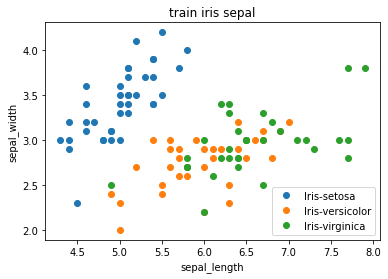

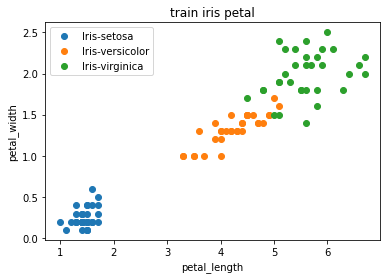

In [50]:
def plot_data(data, title):
    features = data.columns
    data_classes = data.groupby('class')
    for name, group in data_classes:
        plt.plot(group[features[0]], group[features[1]], marker='o', linestyle='', label=number_to_iris_class[name])
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.legend()
    plt.show()
plot_data(train_iris_sepal, 'train iris sepal')
plot_data(train_iris_petal, 'train iris petal')


#### Part B: SVM with ifferent kernels

In [11]:
def evaluate(svm_model, data):
    """ This function gets svm model and data then predicts labels of data and returns f1-score and accuracy """
    features = data.columns
    predicteds = svm_model.predict(data[[features[0], features[1]]])
    reals = data['class'].to_numpy()
    f1_score = metrics.f1_score(reals, predicteds, average='weighted')
    accuracy = metrics.accuracy_score(reals, predicteds)
    return f1_score, accuracy
    
def plot_boundary(svm_model, data, ax, title):
    """ This function gets a svm model and plot boundary classifier """
    features = data.columns
    xx, yy = np.meshgrid(np.arange(data[features[0]].min()-1, data[features[0]].max()+1, 0.1), 
                         np.arange(data[features[1]].min()-1, data[features[1]].max()+1, 0.1))
    predicted = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)
    ax.contourf(xx, yy, predicted)
    
    data_classes = data.groupby('class')
    for name, group in data_classes:
        ax.plot(group[features[0]], group[features[1]], marker='o', linestyle='', label=number_to_iris_class[name])
    
    f1_score, accuracy = evaluate(svm_model, data)
    ax.set(xlabel=features[0], ylabel=features[1], title=title + ', accur:{0:.2f}, f1:{1:.2f}'.format(accuracy, f1_score))
    ax.legend()
    
def fit_and_plot_svm(svm_kernel, data, which_data, parameters):
    """ This function gets kernel and data and parameters of svm model and fits model to data and plot boundary """
    features = data.columns
    fig, axs = plt.subplots(nrows=int(math.ceil(len(parameters)/3)), ncols=3, figsize=(20,8))
    for i, param in enumerate(parameters):
        svm_model = svm.SVC(kernel=svm_kernel, **param)
        svm_model.fit(data[[features[0], features[1]]].to_numpy(), data['class'].to_numpy())
        plot_boundary(svm_model, data, axs[int(i/3)][i%3], '{0}, k:{1}, params:{2}'.format(which_data, svm_kernel, param))
    plt.tight_layout()
    plt.show()

##### SVM with linear kernel

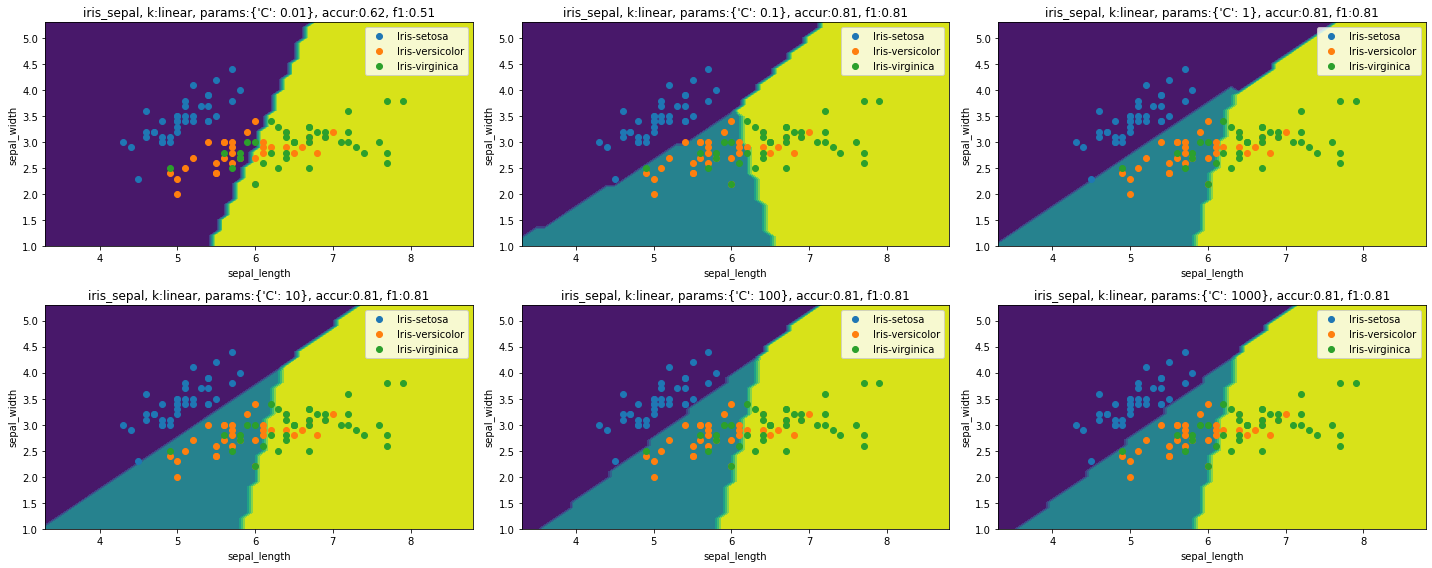

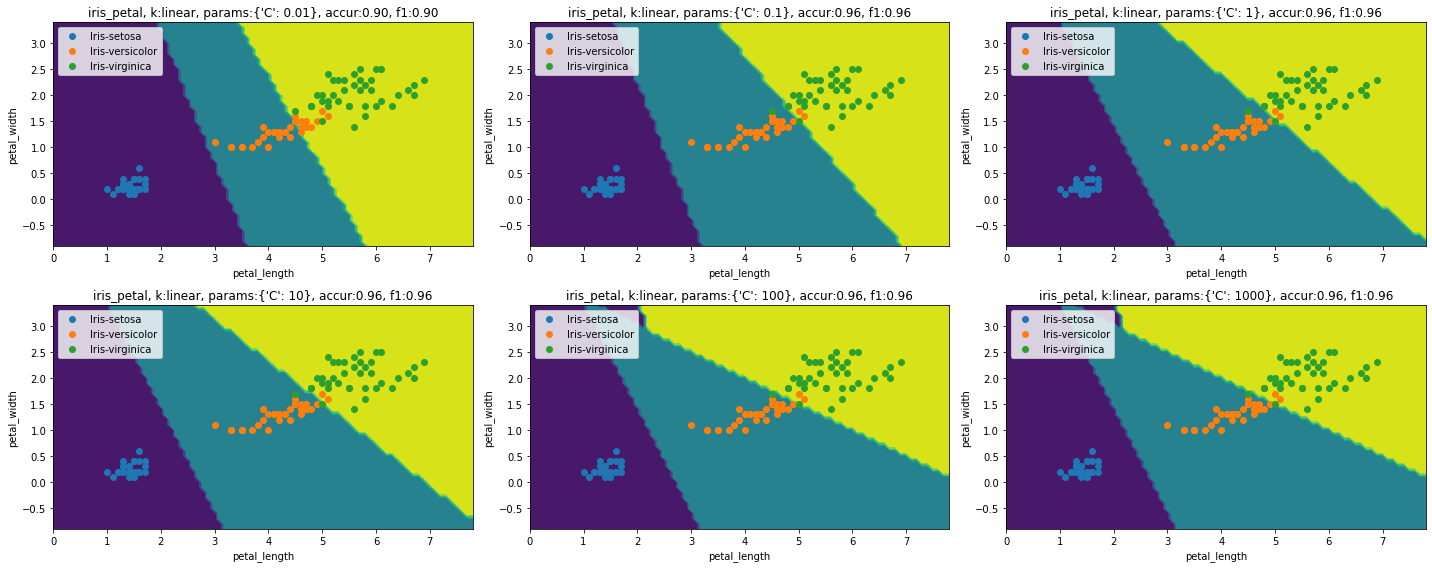

In [12]:
fit_and_plot_svm('linear', train_iris_sepal, 'iris_sepal', [{'C':C} for C in [0.01, 0.1, 1, 10, 100, 1000]])
fit_and_plot_svm('linear', train_iris_petal, 'iris_petal', [{'C':C} for C in [0.01, 0.1, 1, 10, 100, 1000]])

##### SVM with polynomial kernel

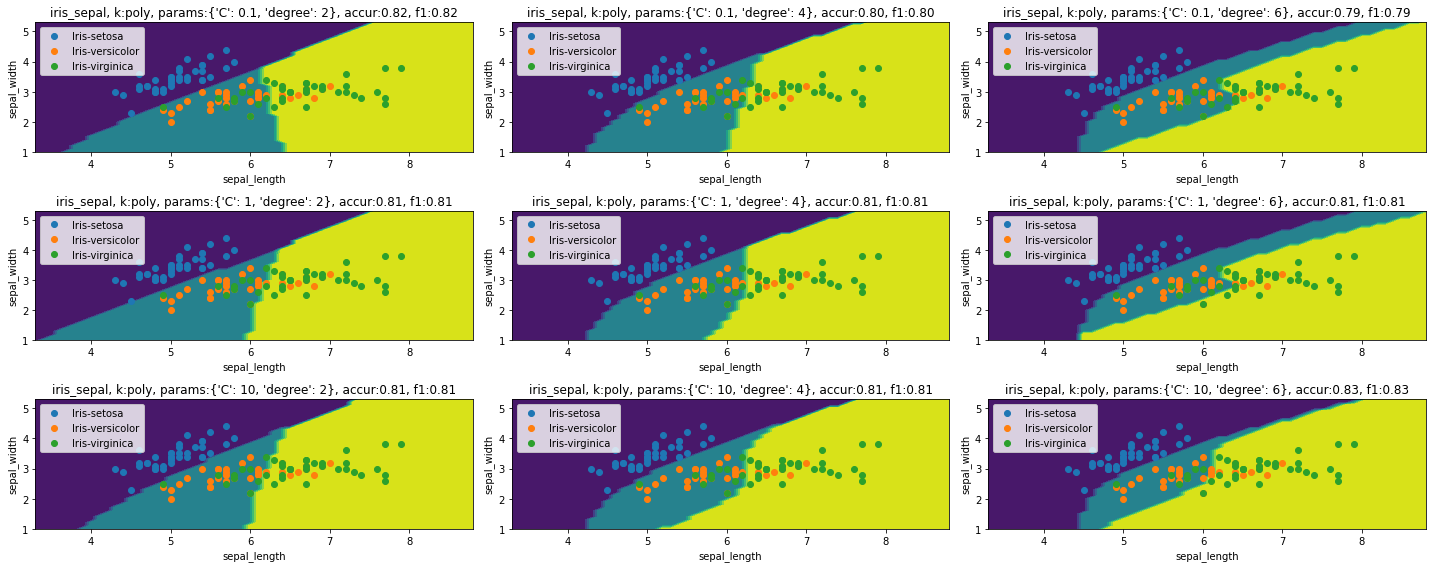

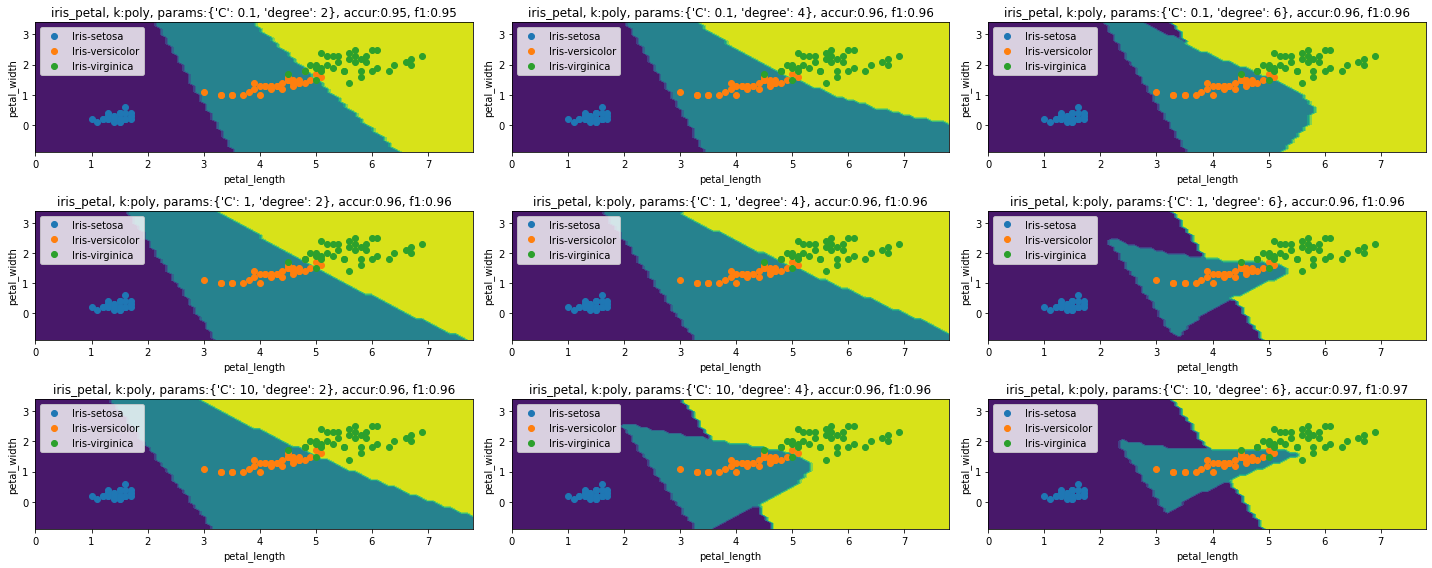

In [19]:
fit_and_plot_svm('poly', train_iris_sepal, 'iris_sepal', [{'C': C, 'degree': degree} for C in [0.1, 1, 10] for degree in [2, 4, 6]])
fit_and_plot_svm('poly', train_iris_petal, 'iris_petal', [{'C': C, 'degree': degree} for C in [0.1, 1, 10] for degree in [2, 4, 6]])

##### SVM with RBF kernel

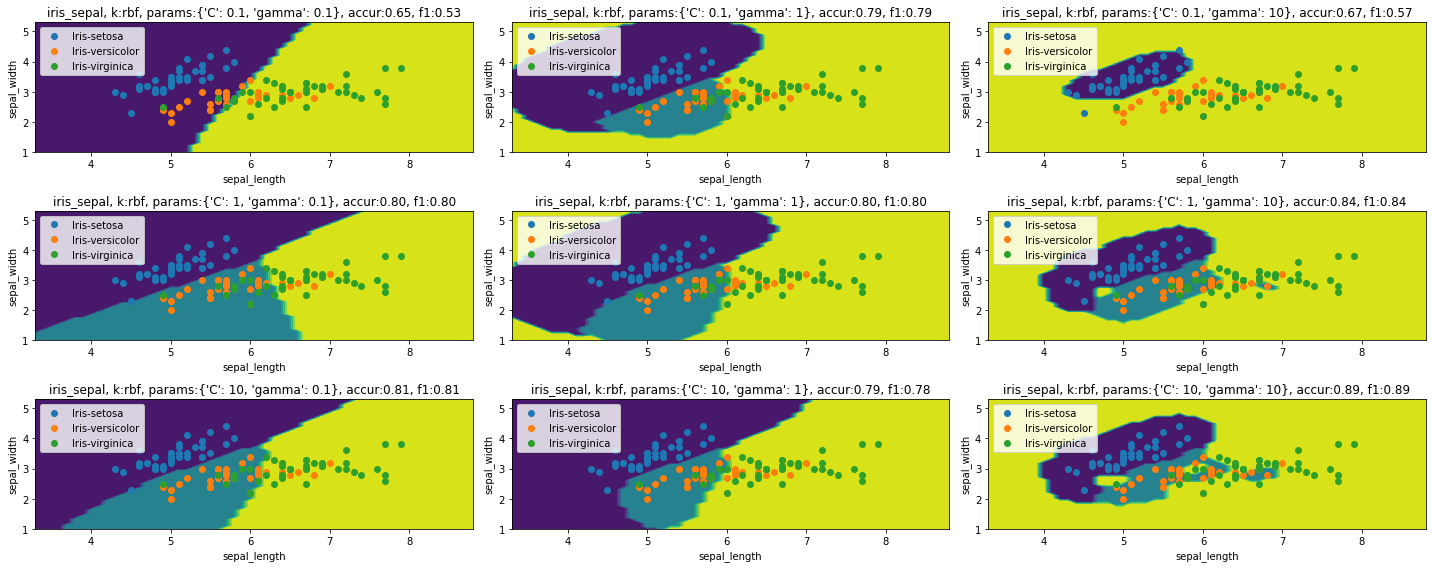

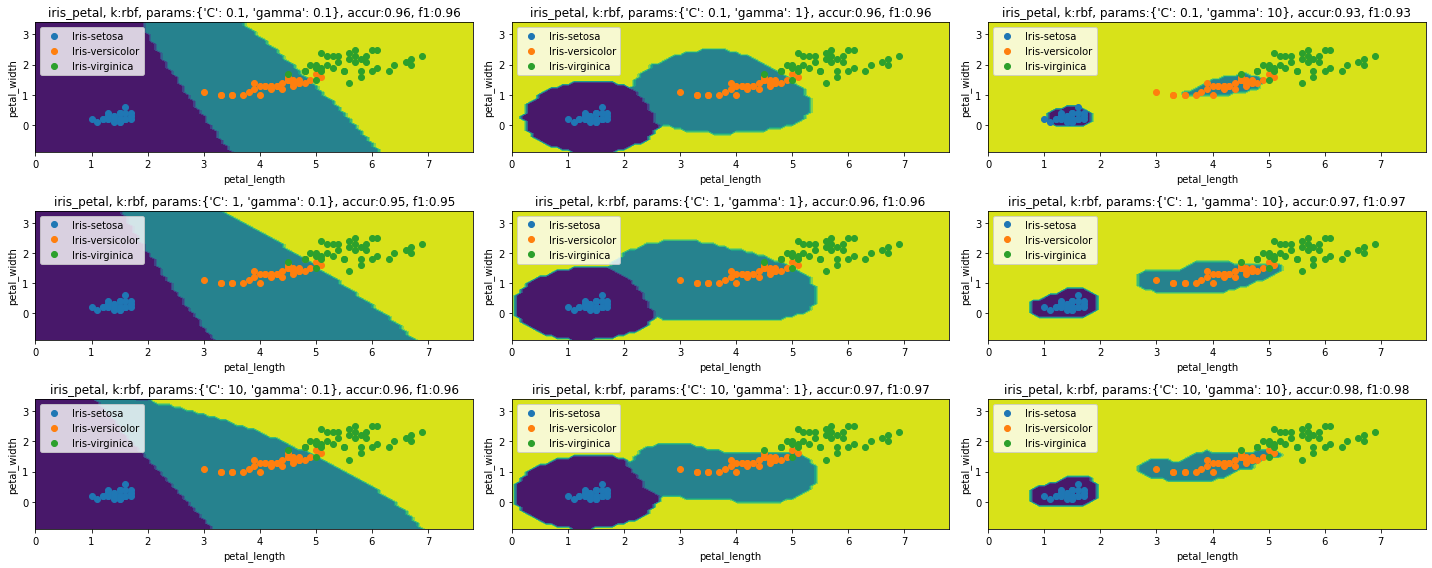

In [17]:
fit_and_plot_svm('rbf', train_iris_sepal, 'iris_sepal', [{'C': C, 'gamma': gamma} for C in [0.1, 1, 10] for gamma in [0.1, 1, 10]])
fit_and_plot_svm('rbf', train_iris_petal, 'iris_petal', [{'C': C, 'gamma': gamma} for C in [0.1, 1, 10] for gamma in [0.1, 1, 10]])

##### SVM with sigmoid kernel

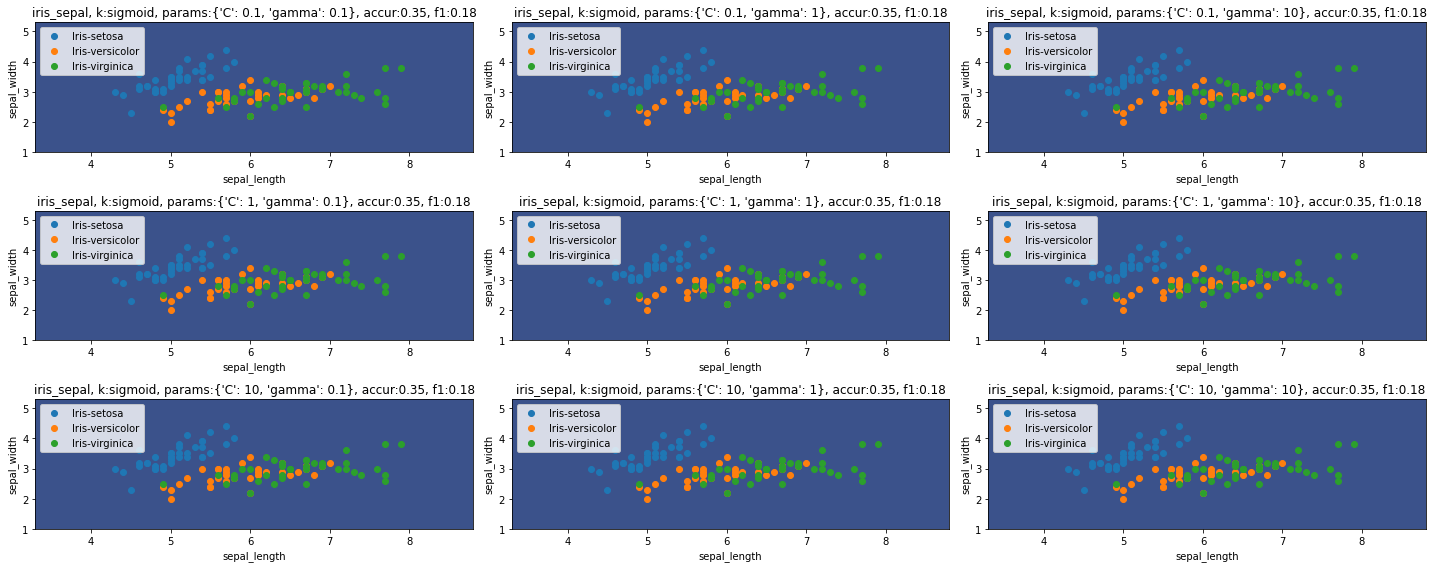

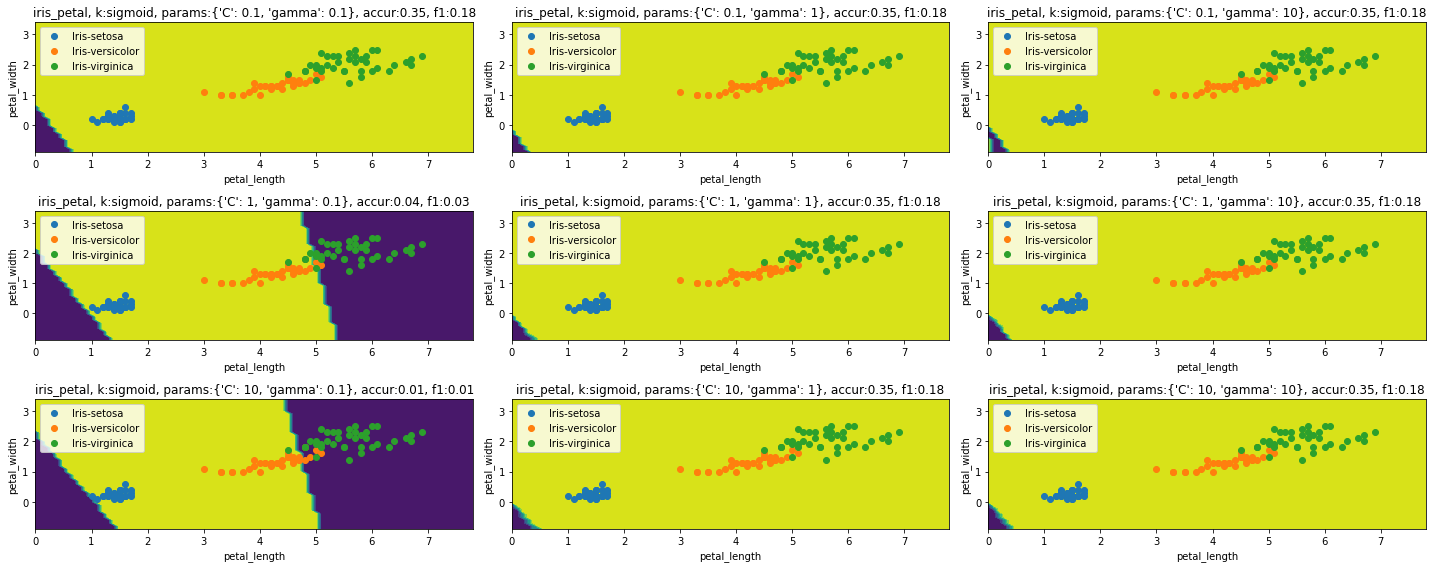

In [18]:
fit_and_plot_svm('sigmoid', train_iris_sepal, 'iris_sepal', [{'C': C, 'gamma': gamma} for C in [0.1, 1, 10] for gamma in [0.1, 1, 10]])
fit_and_plot_svm('sigmoid', train_iris_petal, 'iris_petal', [{'C': C, 'gamma': gamma} for C in [0.1, 1, 10] for gamma in [0.1, 1, 10]])

#### Part C: Evaluate trained model on test data and print the accuracy and f1-score

In [49]:
def eval_test_data(train_data, test_data, which_data, params):
    """ This fuction gets train and test data and calculates accuracy and f1-score """
    features = train_data.columns
    print('######### {}: #########'.format(which_data))
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print('kernel: {}'.format(kernel))
        for param in params[kernel]:
            svm_model = svm.SVC(kernel=kernel, **param)
            svm_model.fit(train_data[[features[0], features[1]]].to_numpy(), train_iris_sepal['class'].to_numpy())
            accuracy, f1 = evaluate(svm_model, test_data)
            print('   parameters: {}'.format(param))
            print('       accuracy: {:.3f}'.format(accuracy))
            print('       f1-score: {:.3f}'.format(f1))  
    print()

params = {'linear':[{'C':0.1}, {'C':10}], 'poly':[{'C':1, 'degree':2}, {'C':1, 'degree':6}], 
          'rbf':[{'C':1, 'gamma':0.1}, {'C':1, 'gamma':10}], 'sigmoid':[{'C':1, 'gamma':0.1}, {'C':1, 'gamma':10}]
         }  
eval_test_data(train_iris_sepal, test_iris_sepal, 'sepal iris', params)
eval_test_data(train_iris_petal, test_iris_petal, 'petal iris', params)

######### sepal iris: #########
kernel: linear
   parameters: {'C': 0.1}
       accuracy: 0.820
       f1-score: 0.822
   parameters: {'C': 10}
       accuracy: 0.777
       f1-score: 0.778
kernel: poly
   parameters: {'C': 1, 'degree': 2}
       accuracy: 0.777
       f1-score: 0.778
   parameters: {'C': 1, 'degree': 6}
       accuracy: 0.777
       f1-score: 0.778
kernel: rbf
   parameters: {'C': 1, 'gamma': 0.1}
       accuracy: 0.798
       f1-score: 0.800
   parameters: {'C': 1, 'gamma': 10}
       accuracy: 0.777
       f1-score: 0.778
kernel: sigmoid
   parameters: {'C': 1, 'gamma': 0.1}
       accuracy: 0.096
       f1-score: 0.244
   parameters: {'C': 1, 'gamma': 10}
       accuracy: 0.096
       f1-score: 0.244

######### petal iris: #########
kernel: linear
   parameters: {'C': 0.1}
       accuracy: 1.000
       f1-score: 1.000
   parameters: {'C': 10}
       accuracy: 0.978
       f1-score: 0.978
kernel: poly
   parameters: {'C': 1, 'degree': 2}
       accuracy: 0.978
     